<a href="https://colab.research.google.com/github/Cilans-Systems/PythonTraining/blob/main/S4/Oil_and_Natural_Gas_Price_Analysis_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil & Gas Price Analysis:  Problem Statement:<br/>
Predicting daily oil and gas prices is not an easy job. So many factors like economic growth or decline, geopolitical event, and climate conditions.<br/>
The first step is to visualize oil price <br/>
The second step is to visualize the gas price <br/>
Third step is to understand the correlation between oil and gas price.<br/>


1.) Import the required libraries
2.) Import the dataset and review the data frame
3.) Plotting a general graph from the dataset
4.) Histograms and daily price distribution (pct.change)

source ref:  Medium.com


In [2]:
!git clone https://github.com/Cilans-Systems/PythonTraining.git
import os
os.chdir('/content/PythonTraining/S4')

### About Dataset:
Oil price dataset contains Europe Brent Spot Price FOB and the gas price dataset contains Henry Hub Natural Gas Spot Price (Dollars per Million Btu).

###  Following kind of advanced Analysis can be achived 


Oil & Gas Price Analysis:<br/>
1.) Import the required libraries<br/>
2.) Import the dataset and review the data frame<br/>
3.) Plotting a general graph from the dataset<br/>
4.) Histograms and daily price distribution (pct.change)<br/>
5.) Daily percentage change distribution (+-%1, +-%5 change)<br/>
6.) Extreme and normal condition probabilities<br/>
7.) Investigating Extremes — Minimum and Maximum values and their position<br/>
8.) Add week, month, year columns<br/>
9.) Pivot tables and group the data according to columns<br/>

In [3]:
#!pip install pandas==1.2.0
# !pip install xlrd==2.0.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read an Excel file into a pandas DataFrame.

In [4]:
brent_oil_price=pd.read_excel("RBRTEd.xls",sheet_name="Data 1",names=["Date","Brent_Price"],skiprows=2455)
WTI_oil_price=pd.read_excel("RWTCd.xls",sheet_name="Data 1",names=["Date","WTI_Price"],skiprows=2801)
Gas_price=pd.read_excel("RNGWHHDd.xls",sheet_name="Data 1",names=["Date","Henry_Hub_Price"],skiprows=2)

###  Data Display

In [5]:
brent_oil_price.head()

,Date,Brent_Price
0,1997-01-07,24.76
1,1997-01-08,24.78
2,1997-01-09,24.83
3,1997-01-10,24.22
4,1997-01-13,23.41


In [6]:
WTI_oil_price.head()

,Date,WTI_Price
0,1997-01-07,26.25
1,1997-01-08,26.55
2,1997-01-09,26.30
3,1997-01-10,26.15
4,1997-01-13,25.20


In [7]:
Gas_price.head()

,Date,Henry_Hub_Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [8]:
# check Row and Column
print(brent_oil_price.shape)
print(WTI_oil_price.shape)
print(Gas_price.shape)

(6195, 2)
(6134, 2)
(6148, 2)


#### Check Null Value and fill

In [9]:
brent_oil_price.isnull().sum()

Date           0
Brent_Price    0
dtype: int64

In [10]:
WTI_oil_price.isnull().sum()

Date         0
WTI_Price    0
dtype: int64

In [11]:
Gas_price.isnull().sum()

Date               0
Henry_Hub_Price    1
dtype: int64

## Data cleaning

In [12]:
print(Gas_price[Gas_price["Henry_Hub_Price"].isnull()])

           Date  Henry_Hub_Price
5284 2018-01-05              NaN


In [13]:
Gas_price.fillna(method="ffill",inplace=True)


In [14]:
Gas_price.isnull().sum()

Date               0
Henry_Hub_Price    0
dtype: int64

### Plot 22 years Brent, WTI and Gas Prices

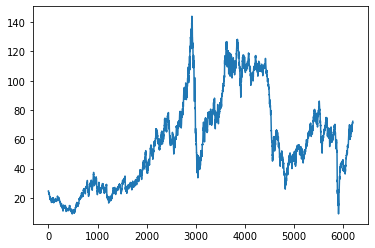

In [15]:
plt.plot(brent_oil_price["Brent_Price"])

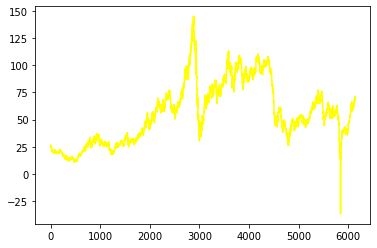

In [16]:
plt.plot(WTI_oil_price["WTI_Price"],color="yellow")

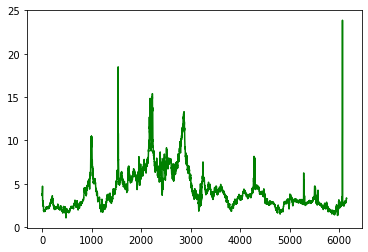

In [17]:
plt.plot(Gas_price["Henry_Hub_Price"],color="Green")

#### Comman WTI and Brent OIL

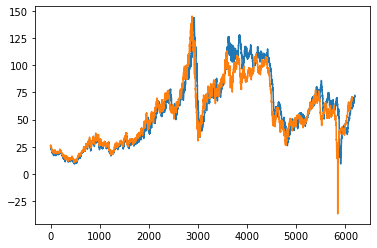

In [18]:
plt.plot(brent_oil_price["Brent_Price"]);plt.plot(WTI_oil_price["WTI_Price"])

In [19]:
### Using Histogram to Check Price Incresing

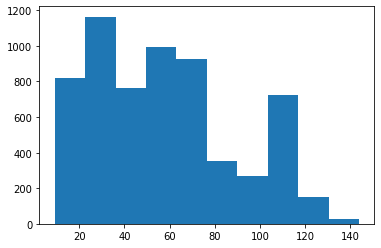

In [20]:
plt.hist(brent_oil_price["Brent_Price"],bins=10)
plt.show()

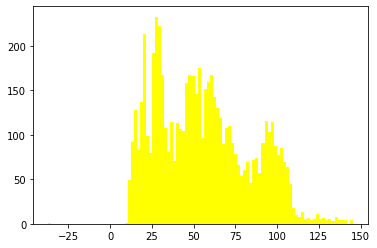

In [21]:
plt.hist(WTI_oil_price["WTI_Price"],bins=100,color="yellow")
plt.show()

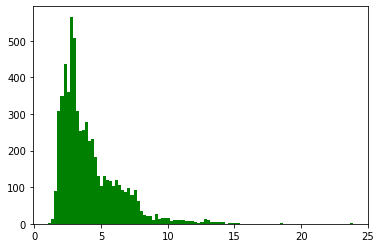

In [22]:
plt.hist(Gas_price["Henry_Hub_Price"],bins=100, color="Green")
plt.show()

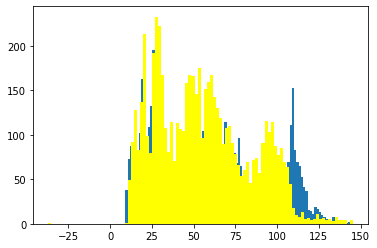

In [23]:
plt.hist(brent_oil_price["Brent_Price"],bins=100);plt.hist(WTI_oil_price["WTI_Price"],color="yellow",bins=100);
plt.show()


#### Daily Percentage Changes in Brent Oil, WTI Oil and Henry Hub Gas Prices


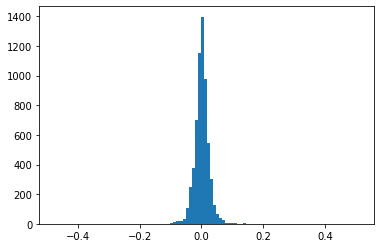

In [24]:
pc_bren=brent_oil_price["Brent_Price"].pct_change()
plt.hist(pc_bren,bins=100)
plt.show()